# Feature Detection and Description

## Understanding Features

In [1]:
import cv22
import numpy as np
import matplotlib.pyplot as plt

## Explanation - opencv2 docs
Most of us will have played the jigsaw puzzle games. We get a lot of small pieces of an image, where we need to assemble them correctly to form a big real image. The question is, how we do it? What about the projecting the same theory to a computer program so that computer can play jigsaw puzzles? If the computer can play jigsaw puzzles, why can't we give a lot of real-life images of a good natural scenery to computer and tell it to stitch all those images to a big single image? If the computer can stitch several natural images to one, what about giving a lot of pictures of a building or any structure and tell computer to create a 3D model out of it?

Well, the questions and imaginations continue. But it all depends on the most basic question: How do we play jigsaw puzzles? How do we arrange lots of scrambled image pieces into a big single image? How can we stitch a lot of natural images to a single image?

The answer is, we are looking for specific patterns or specific features which are unique, can be easily tracked and can be easily compared. If we go for a definition of such a feature, we may find it difficult to express it in words, but we know what they are. If someone asks we to point out one good feature which can be compared across several images, we can point out one. That is why even small children can simply play these games. We search for these features in an image, find them, look for the same features in other images and align them. That's it. (In jigsaw puzzle, we look more into continuity of different images). All these abilities are present in us inherently.

So our one basic question expands to more in number, but becomes more specific. What are these features?. (The answer should be understandable also to a computer.)

It is difficult to say how humans find these features. This is already programmed in our brain. But if we look deep into some pictures and search for different patterns, we will find something interesting. For example, take below image:

Text(0.5, 1.0, 'Feature Building')

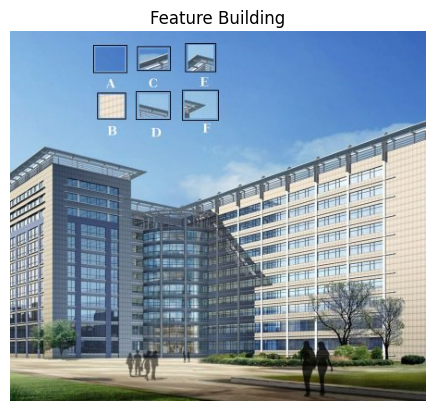

In [2]:
feature_building = cv22.imread("../images/feature_building.jpg")
plt.imshow(cv22.cv2tColor(feature_building, cv22.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Feature Building")

The image is very simple. At the top of image, six small image patches are given. Question for we is to find the exact location of these patches in the original image. How many correct results can we find?

A and B are flat surfaces and they are spread over a lot of area. It is difficult to find the exact location of these patches.

C and D are much more simple. They are edges of the building. we can find an approximate location, but exact location is still difficult. This is because the pattern is same everywhere along the edge. At the edge, however, it is different. An edge is therefore better feature compared to flat area, but not good enough (It is good in jigsaw puzzle for comparing continuity of edges).

Finally, E and F are some corners of the building. And they can be easily found. Because at the corners, wherever we move this patch, it will look different. So they can be considered as good features. So now we move into simpler (and widely used image) for better understanding.



Text(0.5, 1.0, 'Feature Simple')

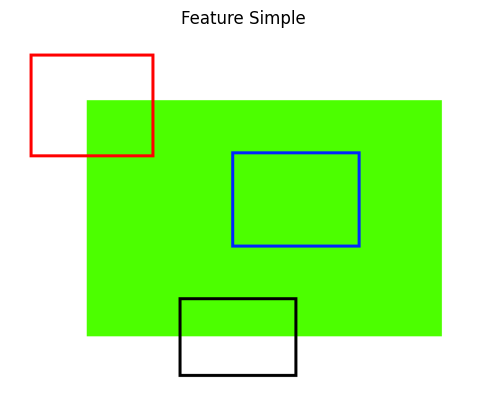

In [3]:
feature_simple = cv22.imread("../images/feature_simple.png")
plt.imshow(cv22.cv2tColor(feature_simple, cv22.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Feature Simple")

Just like above, the blue patch is flat area and difficult to find and track. Wherever we move the blue patch it looks the same. The black patch has an edge. If we move it in vertical direction (i.e. along the gradient) it changes. Moved along the edge (parallel to edge), it looks the same. And for red patch, it is a corner. Wherever we move the patch, it looks different, means it is unique. So basically, corners are considered to be good features in an image. (Not just corners, in some cases blobs are considered good features).

So now we answered our question, "what are these features?". But next question arises. How do we find them? Or how do we find the corners?. We answered that in an intuitive way, i.e., look for the regions in images which have maximum variation when moved (by a small amount) in all regions around it. This would be projected into computer language in coming chapters. So finding these image features is called **Feature Detection**.

We found the features in the images. Once we have found it, we should be able to find the same in the other images. How is this done? We take a region around the feature, we explain it in our own words, like "upper part is blue sky, lower part is region from a building, on that building there is glass etc" and we search for the same area in the other images. Basically, we are describing the feature. Similarly, a computer also should describe the region around the feature so that it can find it in other images. So called description is called **Feature Description**. Once we have the features and its description, we can find same features in all images and align them, stitch them together or do whatever we want.

# Harris Corner Detection
> Corners are regions in the image with large variation in intensity in all the directions.

> It basically finds the difference in intensity for a displacement of (u,v) in all directions

In [4]:
chess_board = cv22.imread("../images/chessboard.png")
gray_chess_board = cv22.cv2tColor(chess_board, cv22.COLOR_BGR2GRAY)

(-0.5, 224.5, 224.5, -0.5)

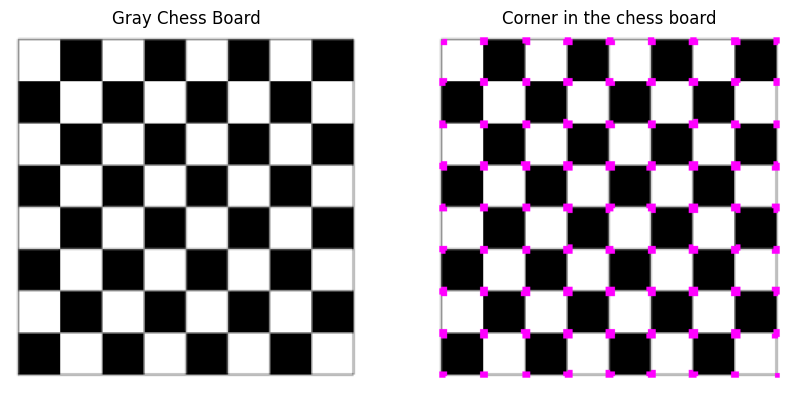

In [6]:
gray = np.float32(gray_chess_board)
dst = cv22.cornerHarris(gray, 2, 3, 0.04)
'''
img (float32 type) 
blockSize (size of neighbourhood for corner detection) 
ksize ( aperture parameter of the sobel derivative used ) 
k ( Harris detector free parameter in the equation )
'''

# result dilate for making the corners
dst = cv22.dilate(dst, None)

chess_board[dst > 0.01 * dst.max()] = [255,0,255]

# ret, thresh = cv22.threshold(dst, 0.01*dst.max(), 255, 0) # 0 -> background, 1 -> foreground
# plt.imshow(thresh, cmap = 'gray')

plt.figure(figsize=(10,7))
plt.subplot(121)
plt.imshow(gray_chess_board, cmap="gray")
plt.title("Gray Chess Board")
plt.axis("off")

plt.subplot(122)
plt.imshow(cv22.cv2tColor(chess_board, cv22.COLOR_BGR2RGB))
plt.title("Corner in the chess board")
plt.axis("off")

# Corner with the SubPixel Accuracy
> Sometimes, we may need to find the corners with maximum accuracy. Opencv2 comes with a function cv2.cornerSubPix() which further refines the corners detected with sub-pixel accuracy. Below is an example. As usual, we need to find the Harris corners first. Then we pass the centroids of these corners (There may be a bunch of pixels at a corner, we take their centroid) to refine them. Harris corners are marked in red pixels and refined corners are marked in green pixels. For this function, we have to define the criteria when to stop the iteration. We stop it after a specified number of iterations or a certain accuracy is achieved, whichever occurs first. We also need to define the size of the neighbourhood it searches for corners.

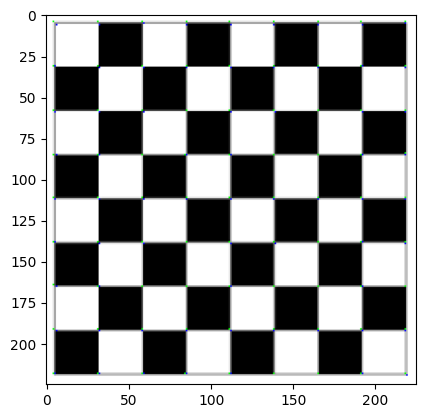

In [13]:
img = cv2.imread("../images/chessboard.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
 
# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
 
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
 
# Now draw them
res = np.hstack((centroids,corners))
res = np.intp(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

plt.imshow(img)

# Shi-Tomasi Corner Detector and G0od Features to Track

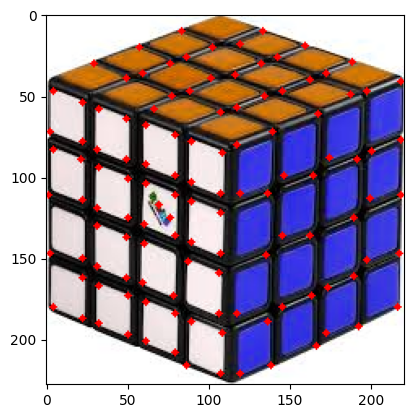

In [25]:
rubik_cube_img = cv2.imread("../images/rubikcube.jpeg")
gray = cv2.cvtColor(rubik_cube_img, cv2.COLOR_BGR2GRAY)

rubik_cube_corners = cv2.goodFeaturesToTrack(gray, 120, 0.01, 10)
rubik_cube_corners = np.intp(rubik_cube_corners)

for i in rubik_cube_corners:
    x,y = i.ravel()
    cv2.circle(rubik_cube_img, (x,y), 2, 255, -1)

plt.imshow(rubik_cube_img)

# Scale Invariant Feature Transform (SIFT)

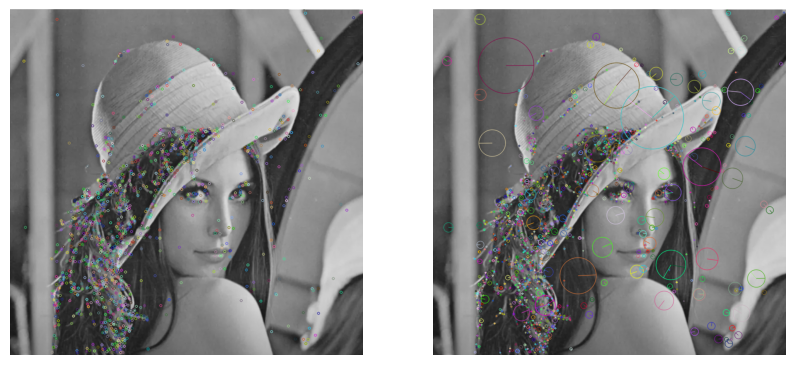

In [44]:
feature_image = cv2.imread("../images/lenna.png")
gray = cv2.cvtColor(feature_image, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
keypoints = sift.detect(gray, None)

plt.figure(figsize= (10,7))

plt.subplot(121)
plt.axis("off")
image = cv2.drawKeypoints(gray, keypoints, feature_image)
plt.imshow(image)


plt.subplot(122)
plt.axis("off")
image2 = cv2.drawKeypoints(gray, keypoints, feature_image, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(image2)

### Calculate the descriptor

In [ ]:
sift = cv2.SIFT_create()

keypoints, descriptors = sift.detectAndCompute(gray, None)

# kp = lists of  keypoints
# des = numpy array of shape number_of_keypoints * 128

# SURF ( Speeded-Up Robust Features )

In [54]:
surf_image = cv2.imread("../images/lenna.png")
gray_surf_image = cv2.cvtColor(surf_image, cv2.COLOR_BGR2GRAY)

# surf = cv2.xfeatures2d.SURF_create()

# FAST Feature Detector in OpenCV

Threshold:  10
nonmaxSuppression:  True
neighborhood:  2
Total Keypoints with nonmaxSuppression:  1469


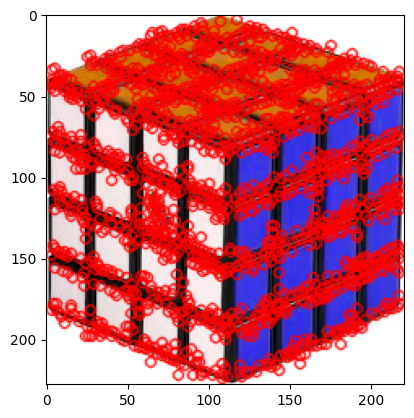

In [63]:
import numpy as np
import cv2

img = cv2.imread("../images/rubikcube.jpeg")

# initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

# find and draw the keypoints
keypoints = fast.detect(img, None)
img2 = cv2.drawKeypoints(img, keypoints, None, color = (255, 0, 0))

#  print all default params
print("Threshold: ", fast.getThreshold())
print("nonmaxSuppression: ", fast.getNonmaxSuppression())
print("neighborhood: ", fast.getType())
print("Total Keypoints with nonmaxSuppression: ", len(keypoints))

plt.imshow(img2)


Total Keypoints without nonmaxSuppression:  4619


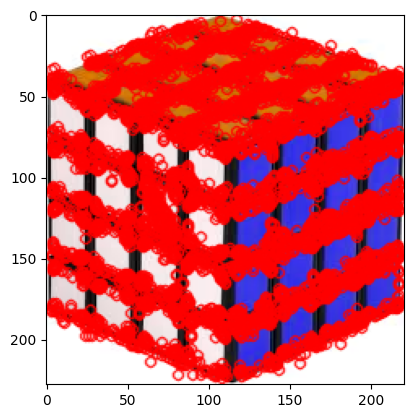

In [64]:
# disable nonmaxsupression
fast.setNonmaxSuppression(0)
keypoints = fast.detect(img, None)

print("Total Keypoints without nonmaxSuppression: ", len(keypoints))

img3 = cv2.drawKeypoints(img, keypoints, None, color = (255, 0, 0))

plt.imshow(img3)

# Feature Matching

### Brute-Force Matching with ORB Descriptors

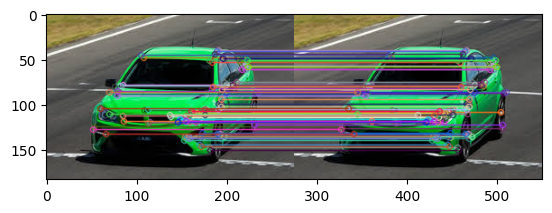

In [78]:
img1 = cv2.imread("../images/green_car.jpeg")
img2 = cv2.imread("../images/green_car.jpeg")
 
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
keypoints_1, descriptors_1 = orb.detectAndCompute(img1, None)
keypoints_2, descriptors_2 = orb.detectAndCompute(img2, None)

# Create a BFMatcher object with distance measurement cv2.NORM_HAMMING
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

matches = bf.match(descriptors_1, descriptors_2)

# sort them in the order of their distance
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:100], None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))



### Brute-Force Matching with SIFT Descriptors and Ratio Test

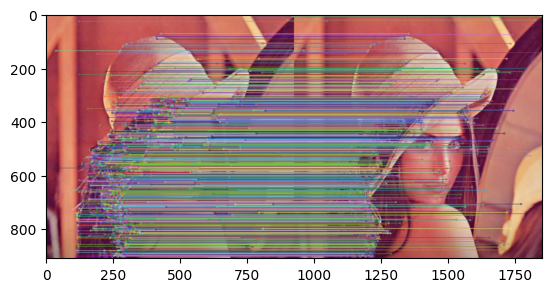

In [90]:
# rotate img1
img1 = cv2.imread("../images/lenna.png")
img2 = img1

rows, cols, channel = img1.shape

center = (cols//2, rows//2)

rotation_angle = 360

scale = 1.0

rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, scale)

img1 = cv2.warpAffine(img1, rotation_matrix, (cols, rows))

# Initiate the SIFT detector
sift = cv2.SIFT_create()

# find the descriptors and keypoints with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k = 2)

# Apply ratio test
good = []

for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
        
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

# FLANN based Matcher

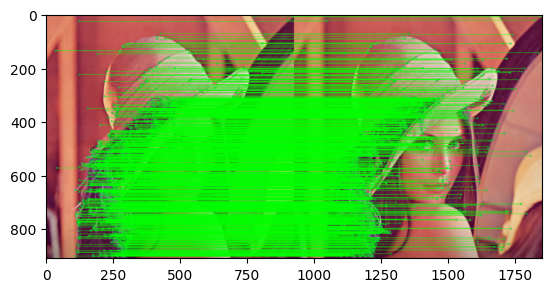

In [91]:
# Flann Parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k = 2)

# need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i, (m,n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1,0]
draw_params = dict(matchColor = (0, 255, 0), singlePointColor = (255, 0, 0), matchesMask = matchesMask, flags = 0)

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))